In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import argparse

In [ ]:

import glob
import cv2

#imageslist = [cv2.imread(file) for file in glob.glob("/content/*rgb.png")]
img = cv2.imread('/content/_rgb.png')
leafcounts = pd.read_csv('/content/Leaf_counts2.csv')
images = np.asarray(imageslist)

In [ ]:
def segment(img,K):
  img2 = img.reshape((-1,3))
  img2= np.float32(img2)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10,1.0)

  attempts = 10
  ret,label,center = cv2.kmeans(img2,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  return ret,label,res.reshape((img.shape)) 


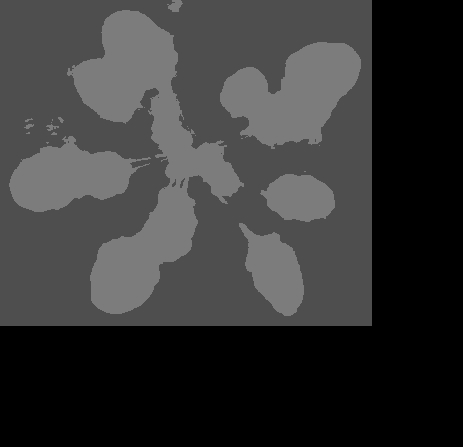

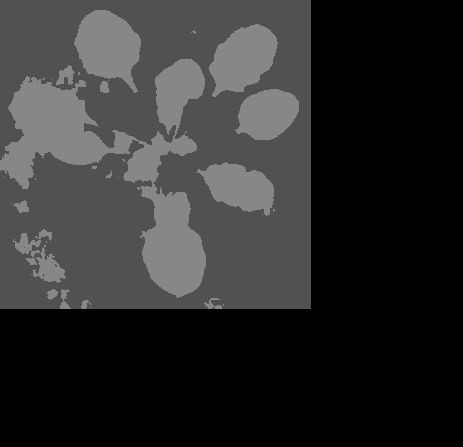

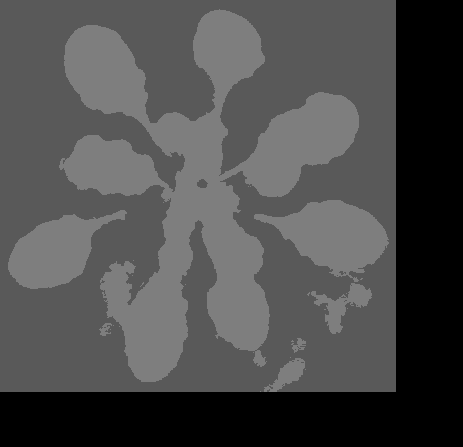

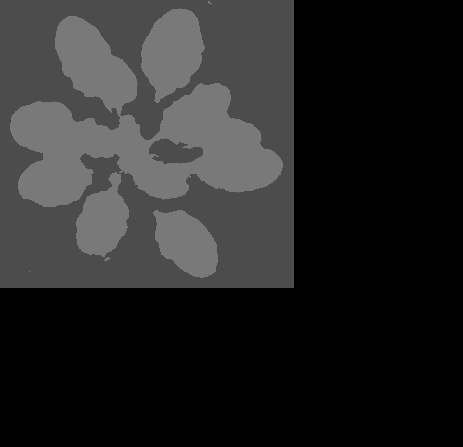

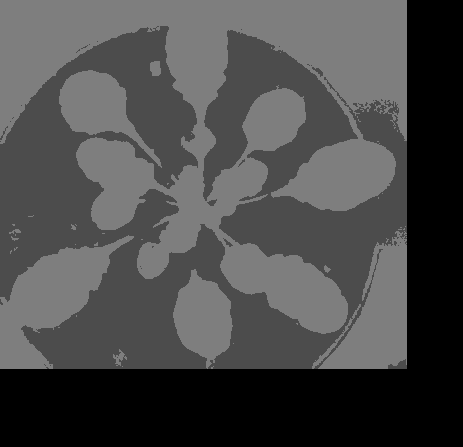

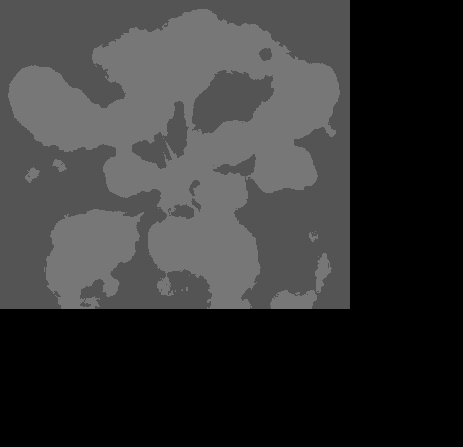

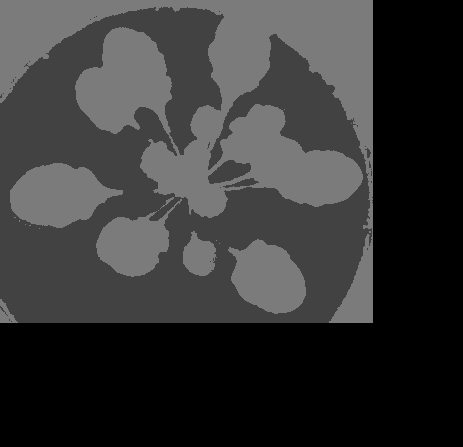

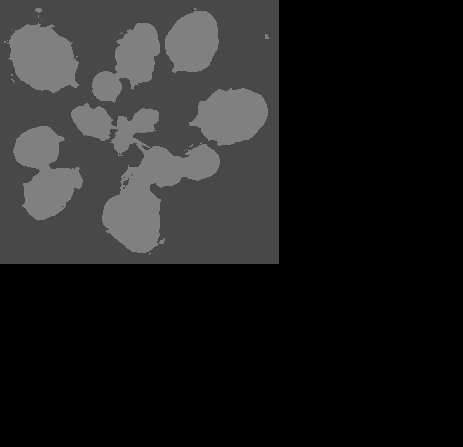

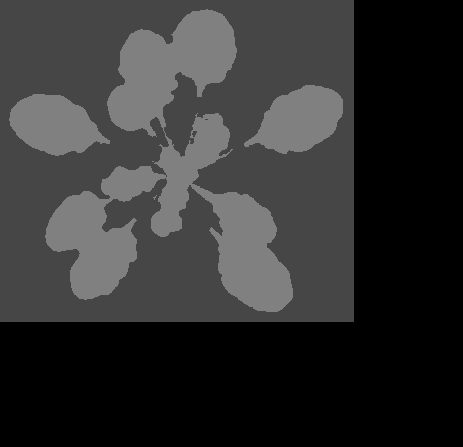

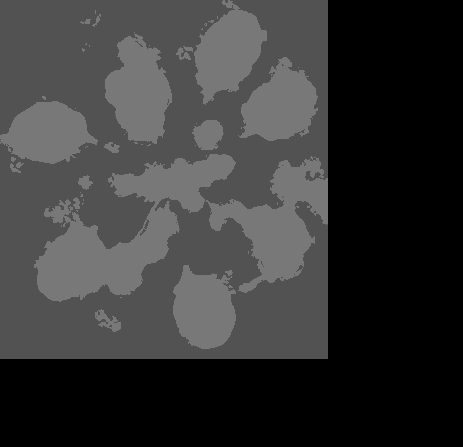

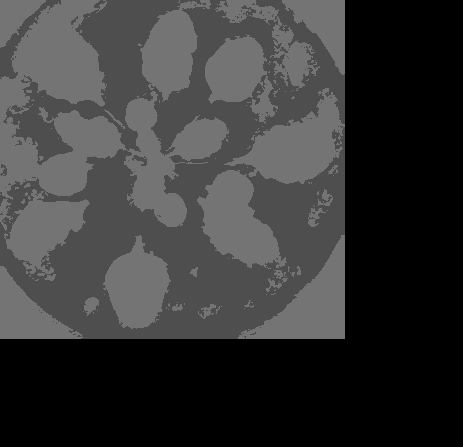

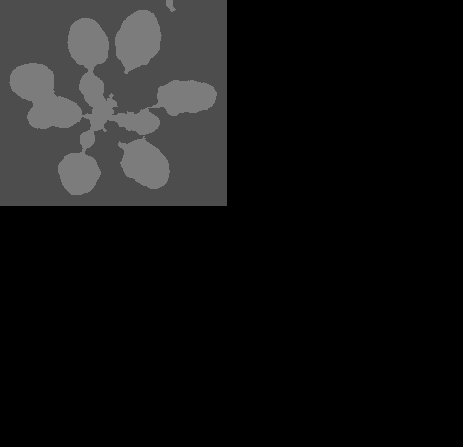

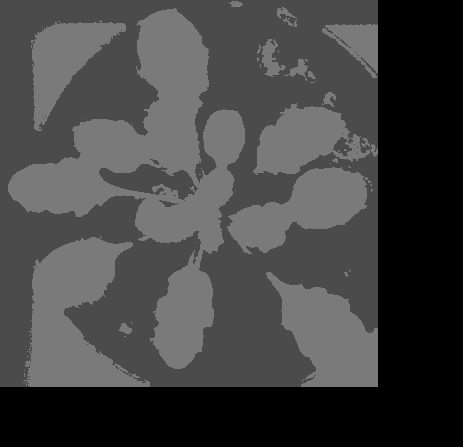

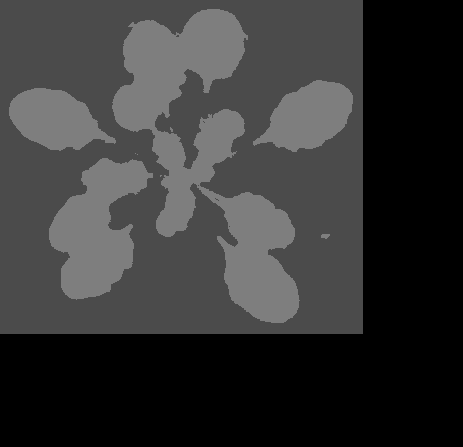

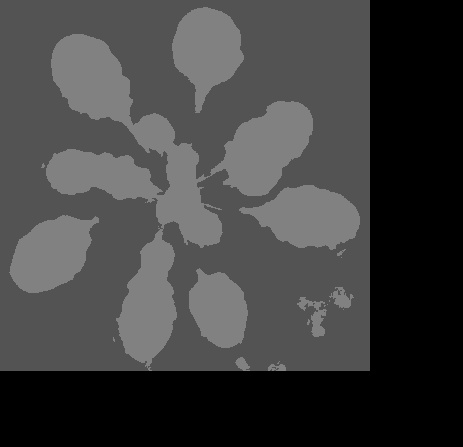

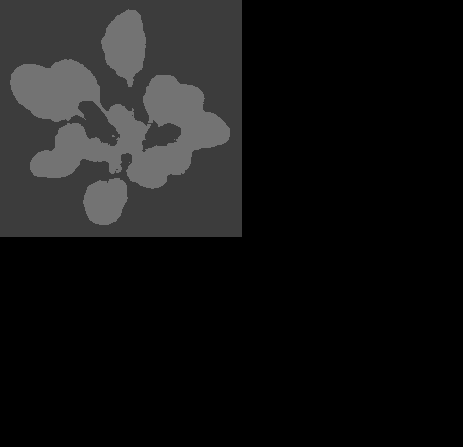

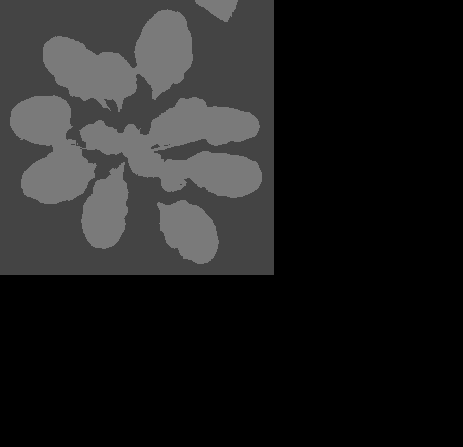

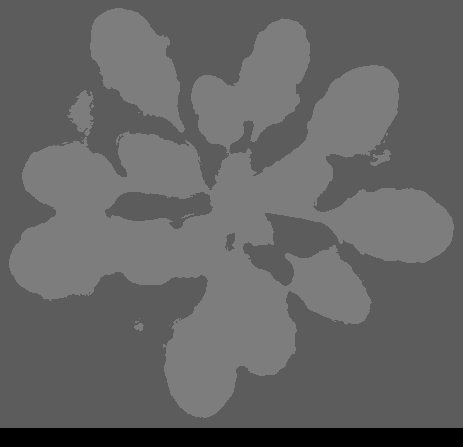

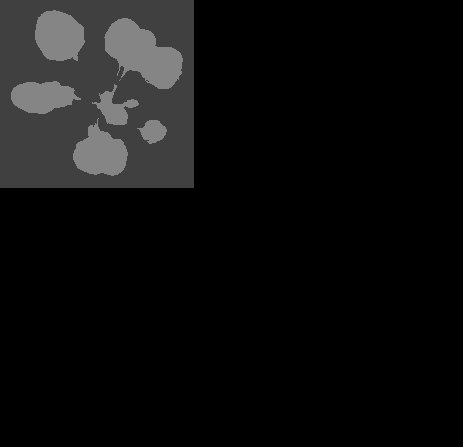

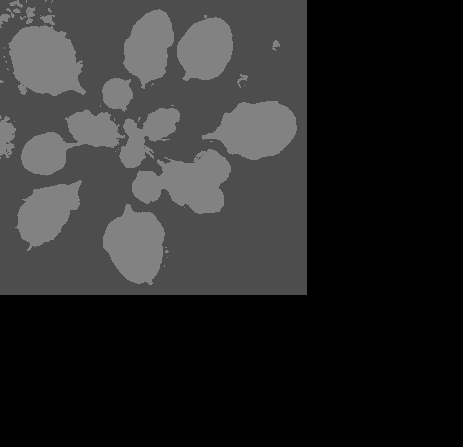

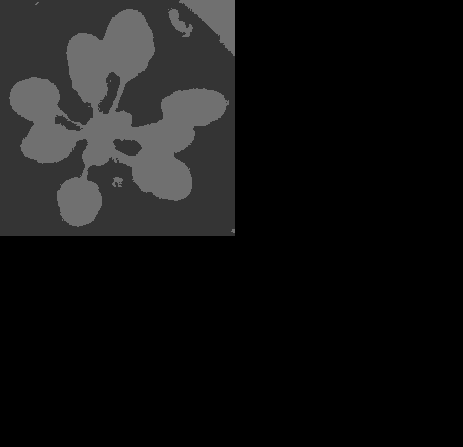

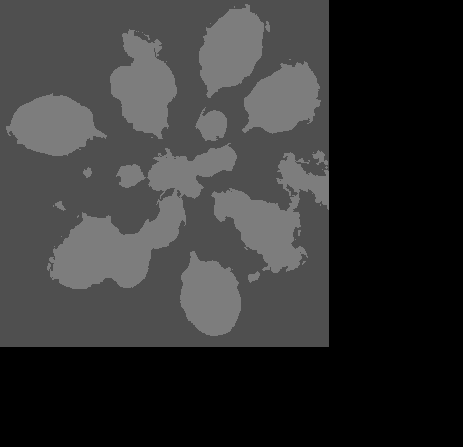

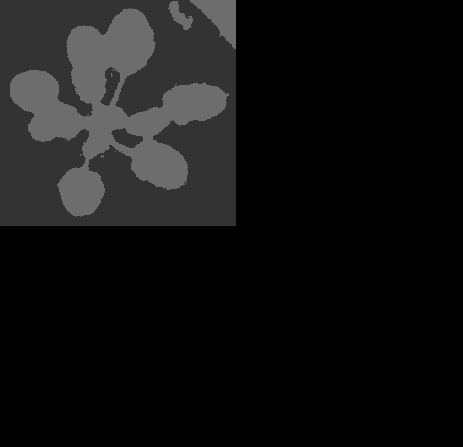

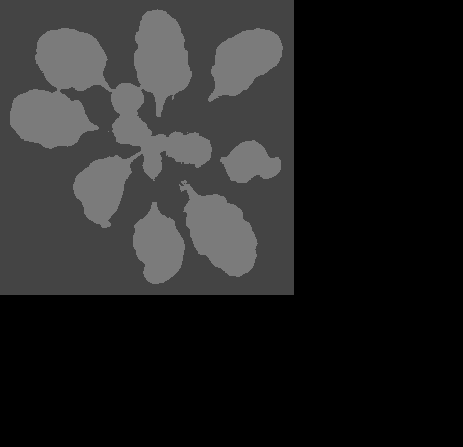

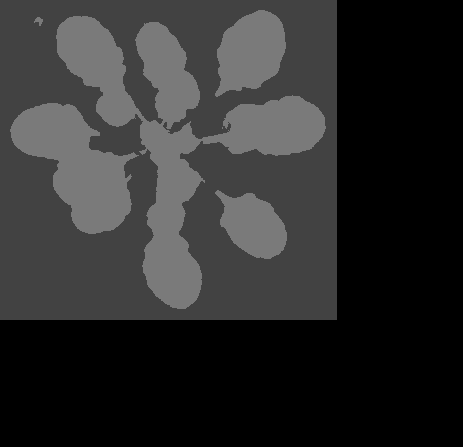

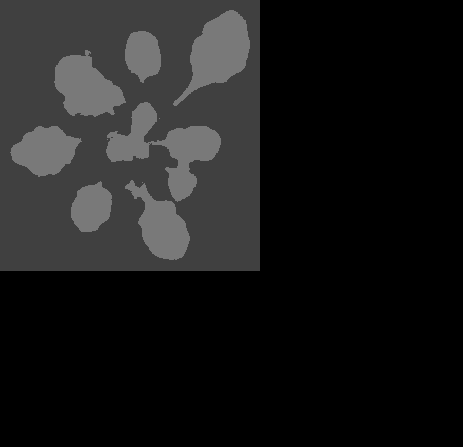

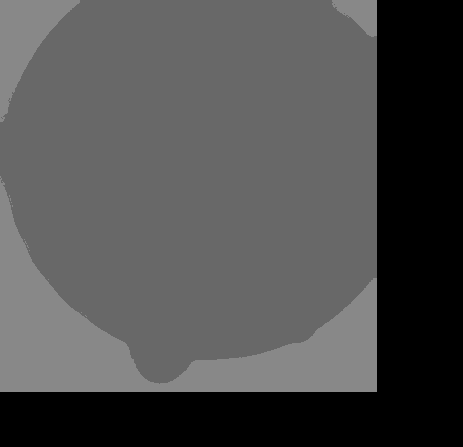

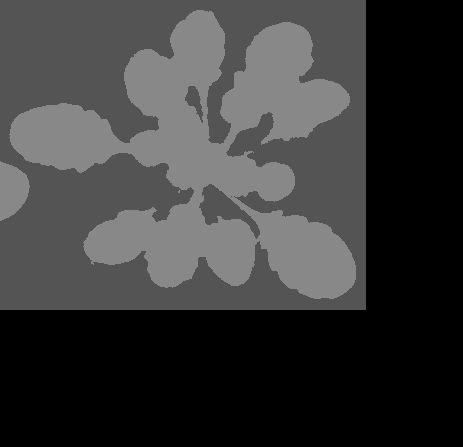

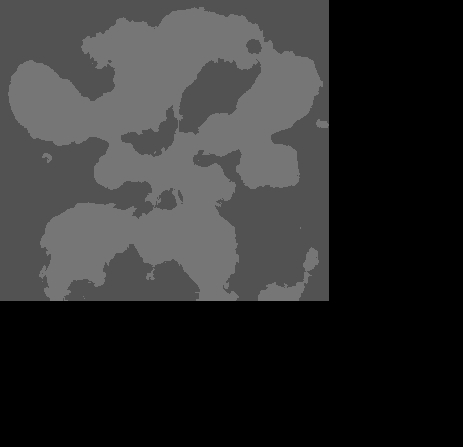

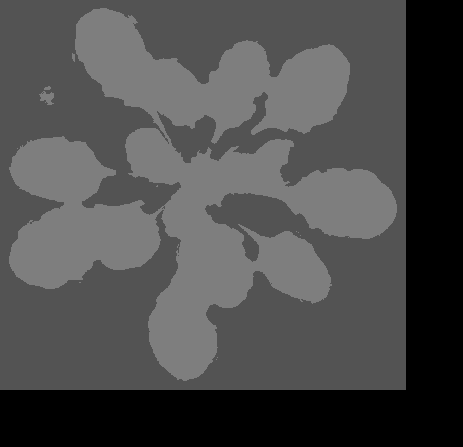

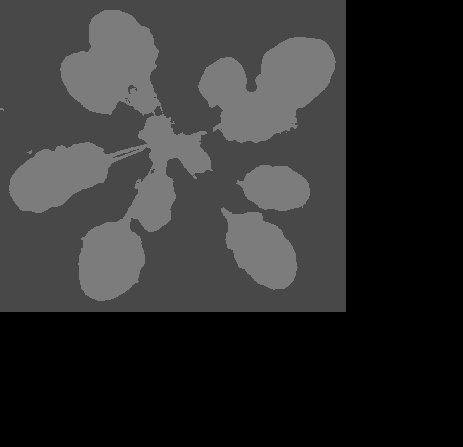

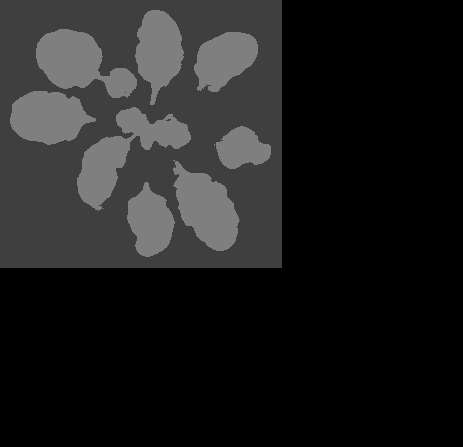

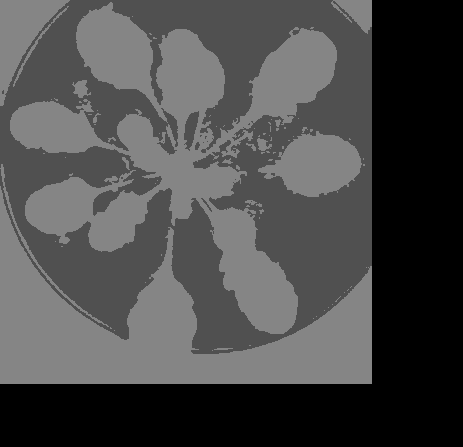

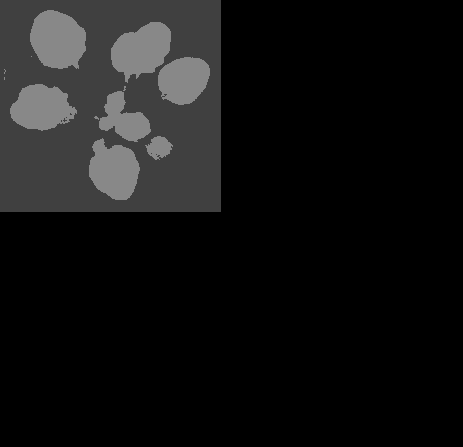

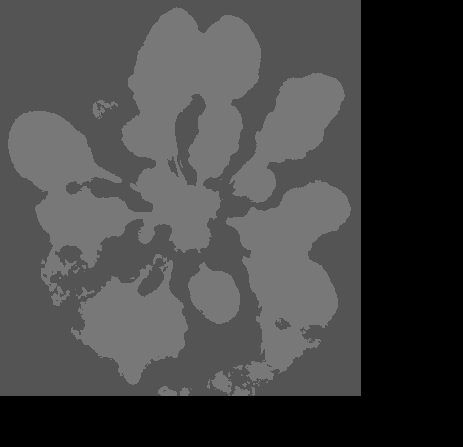

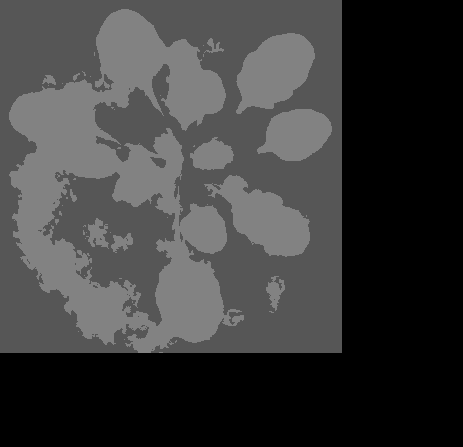

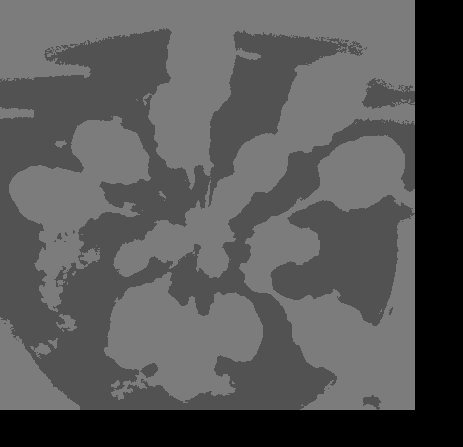

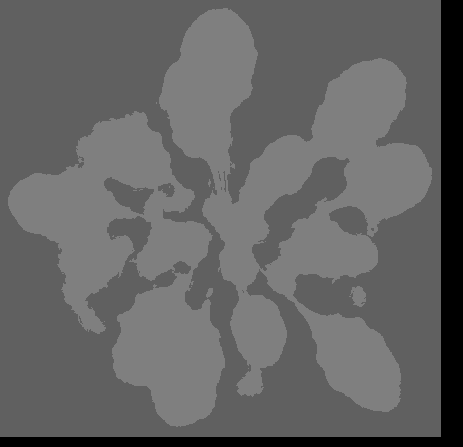

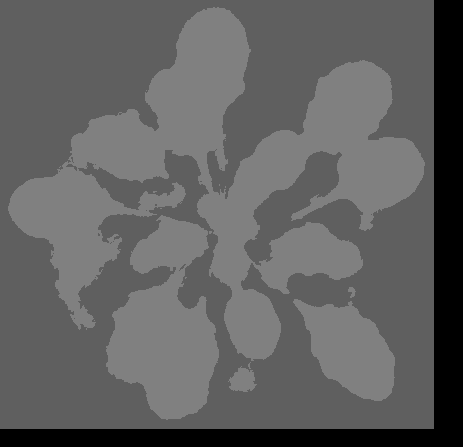

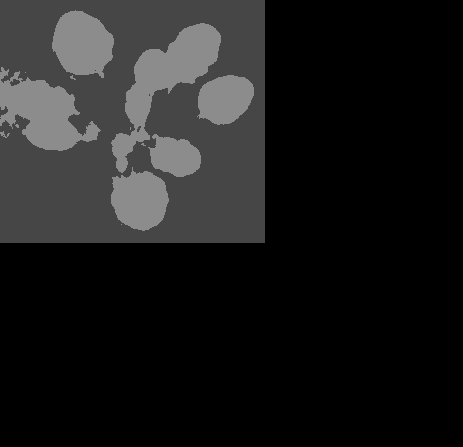

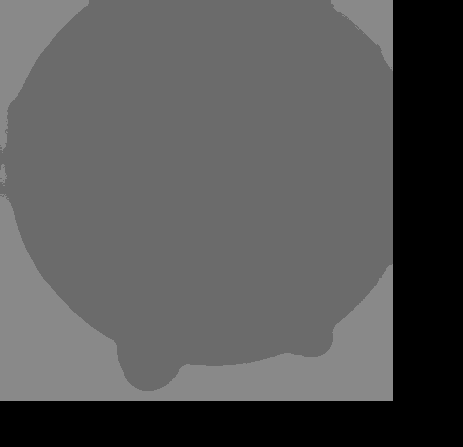

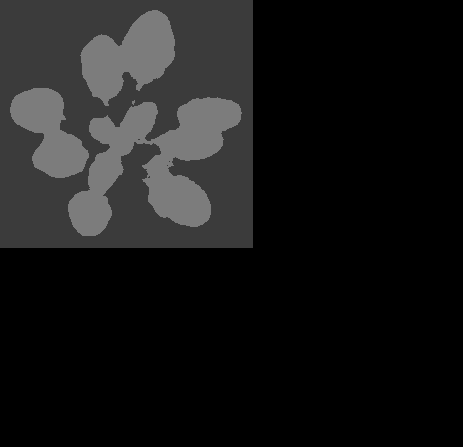

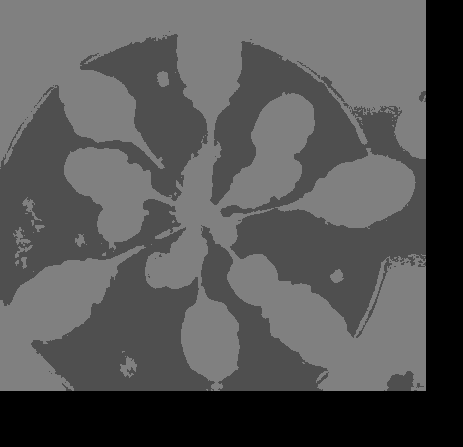

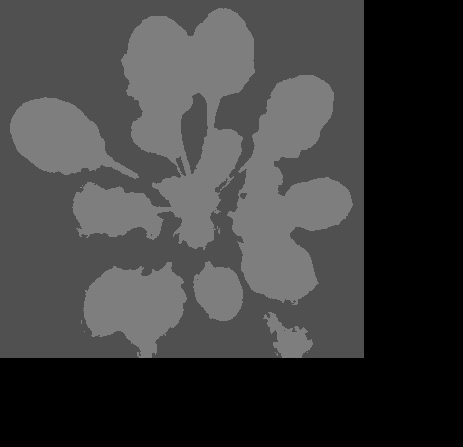

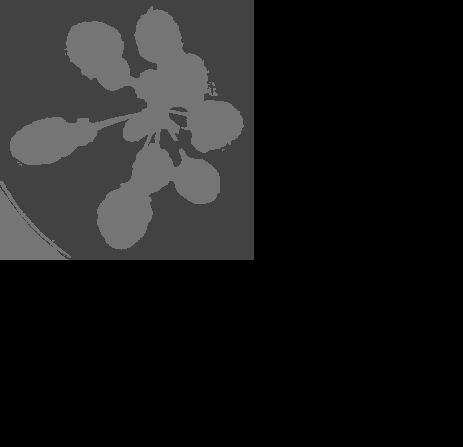

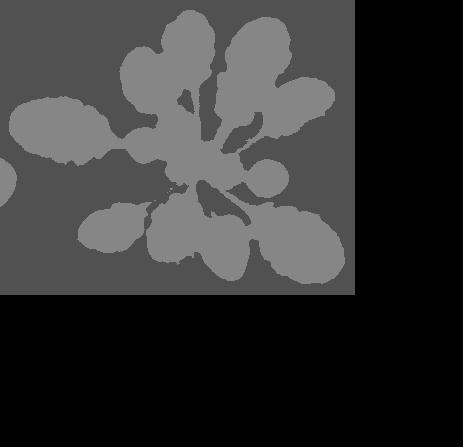

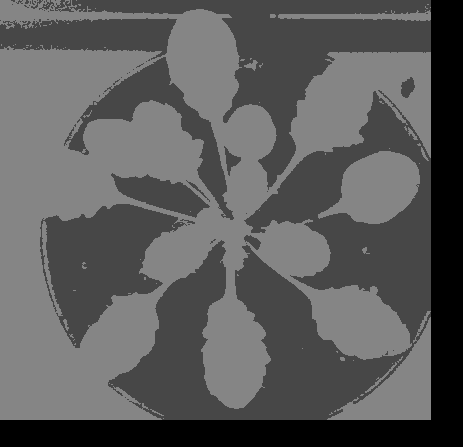

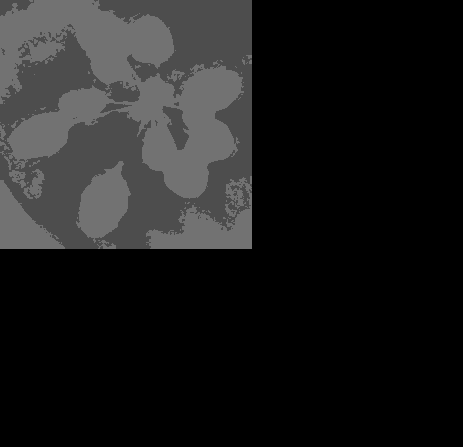

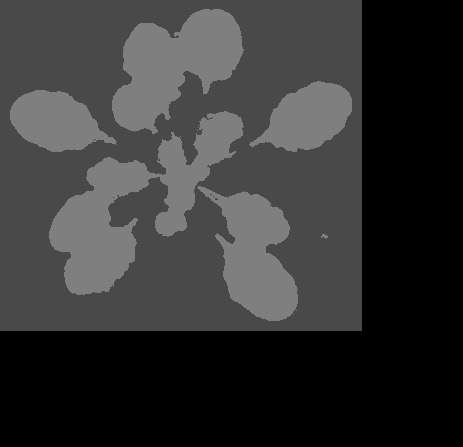

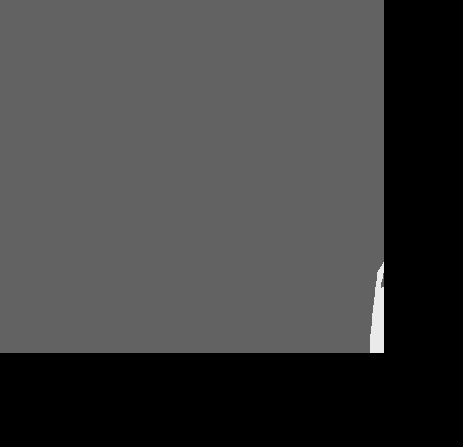

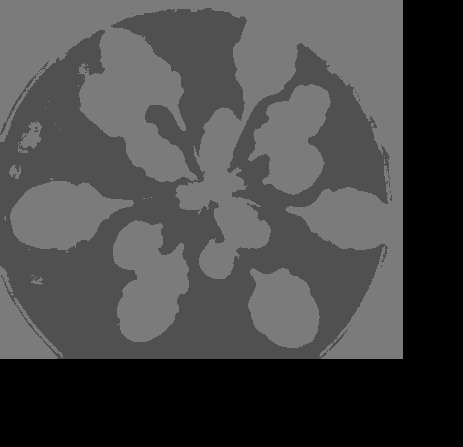

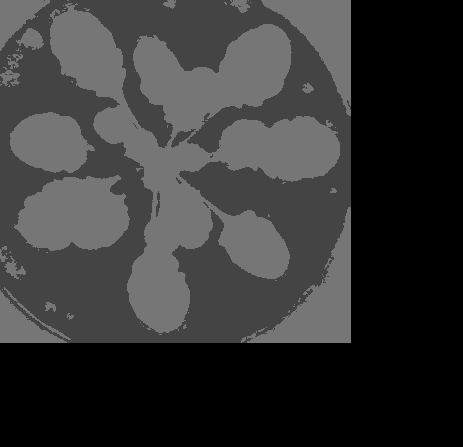

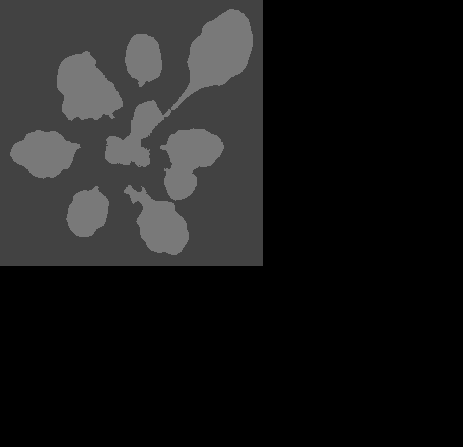

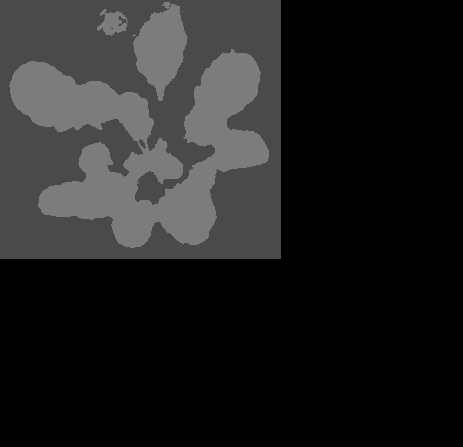

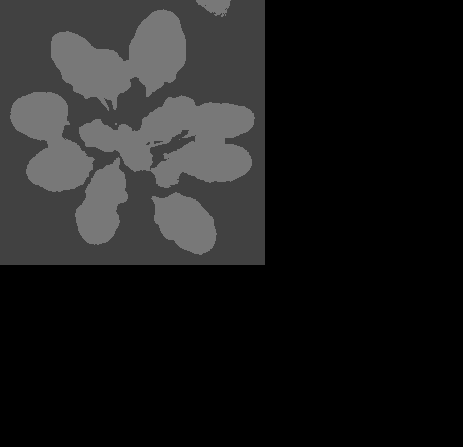

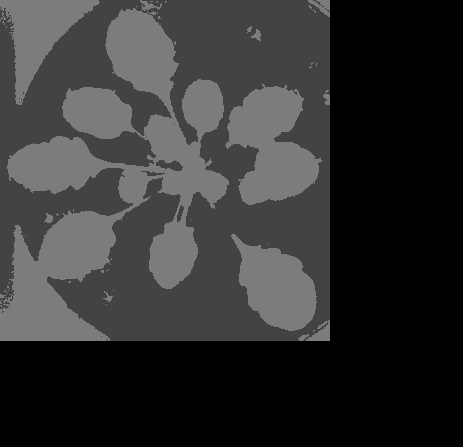

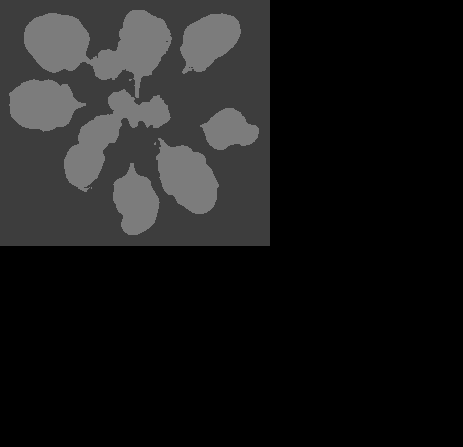

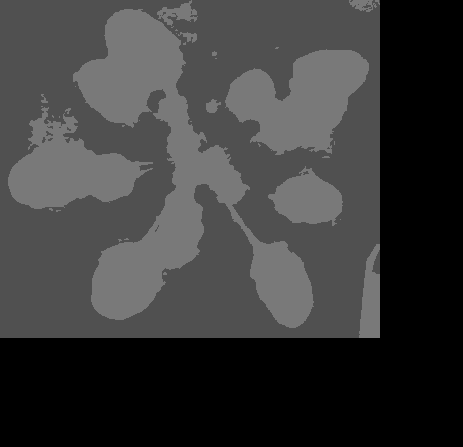

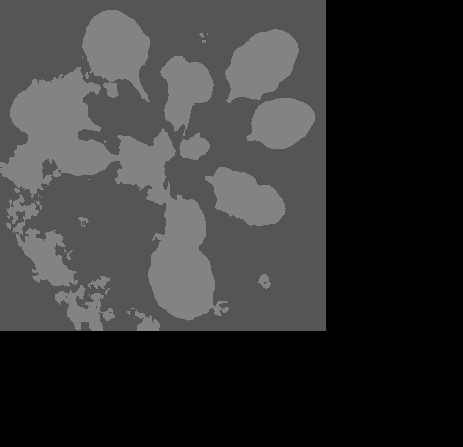

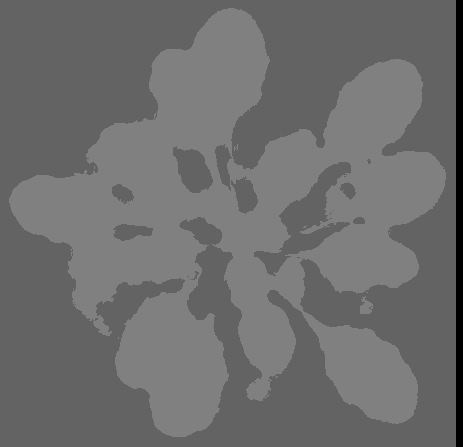

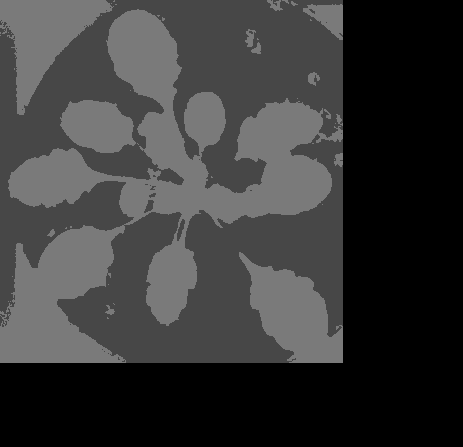

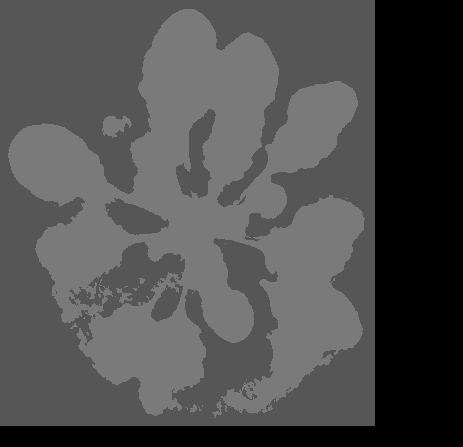

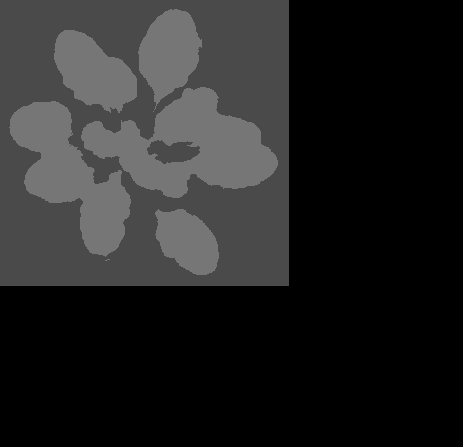

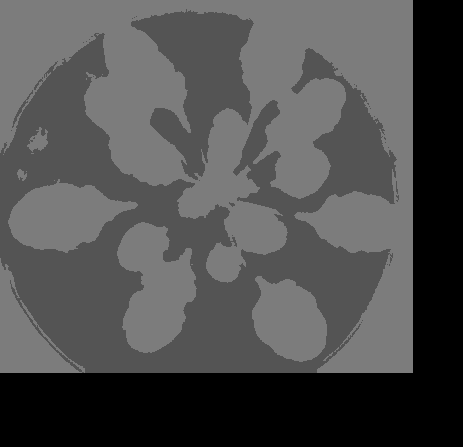

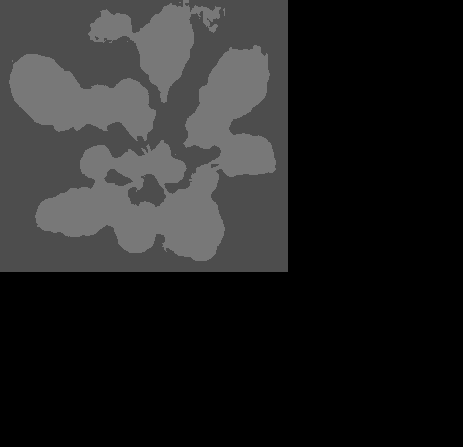

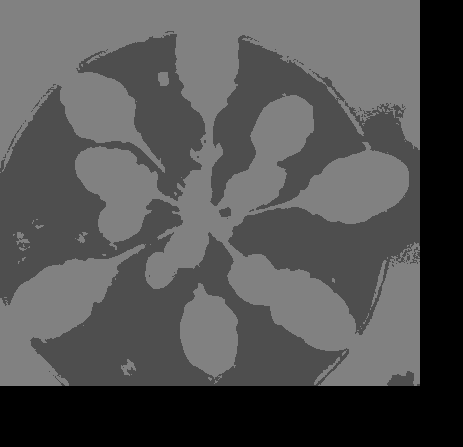

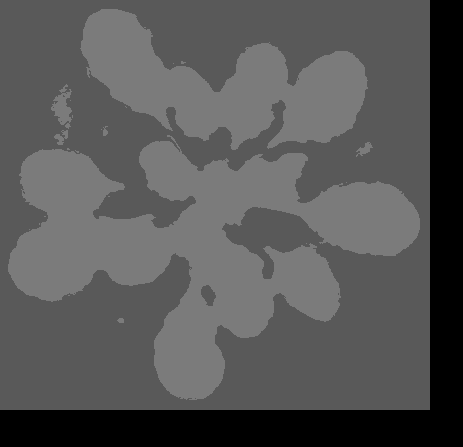

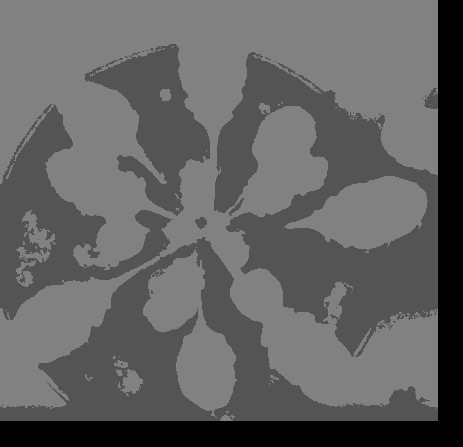

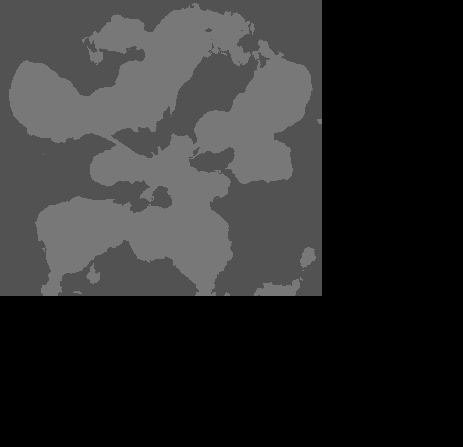

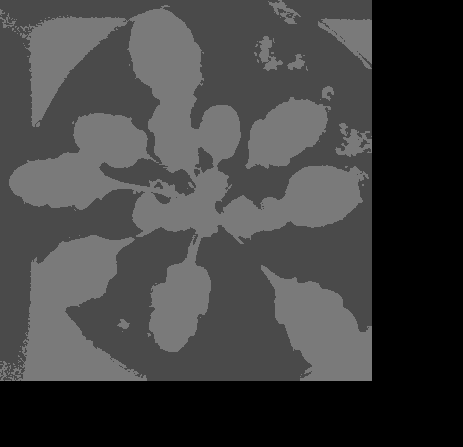

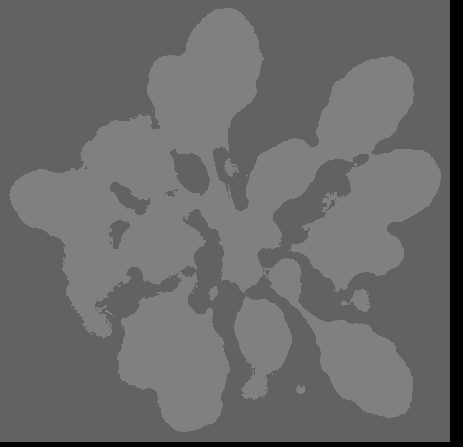

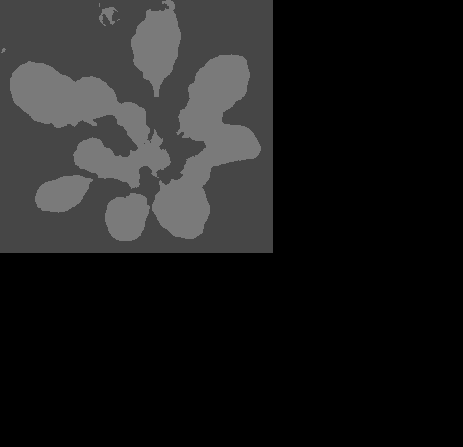

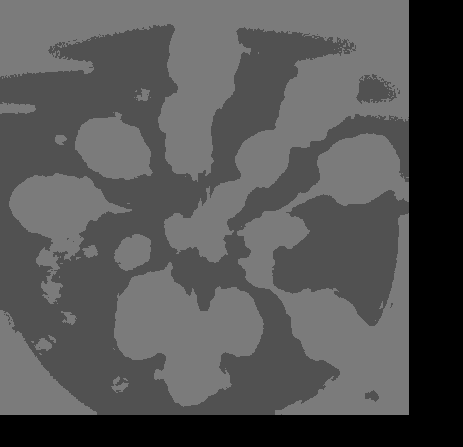

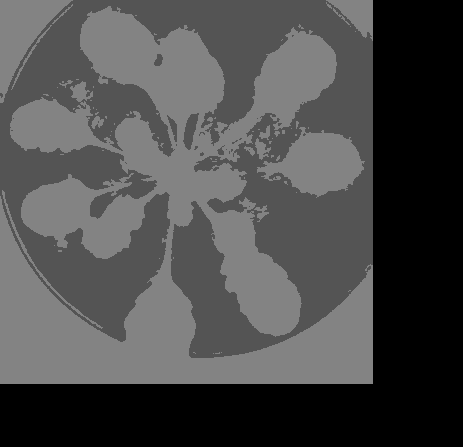

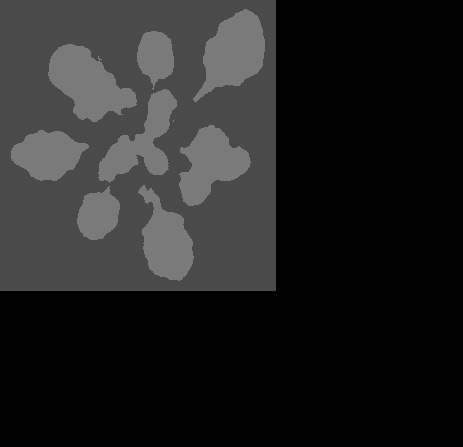

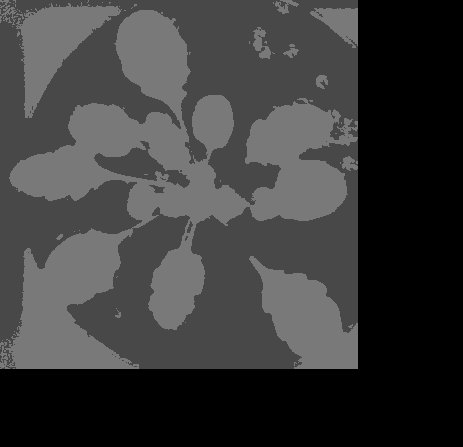

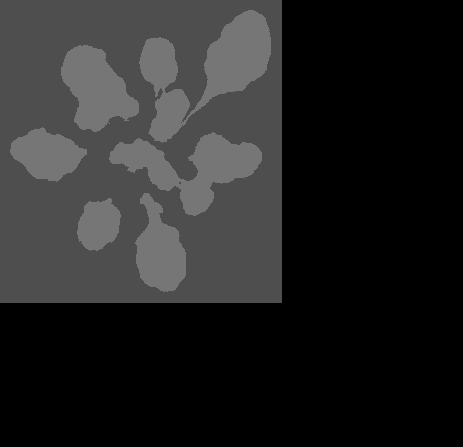

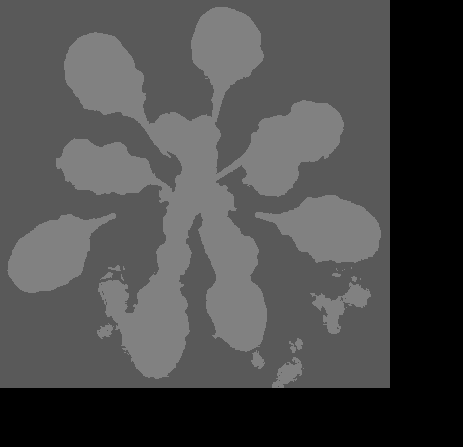

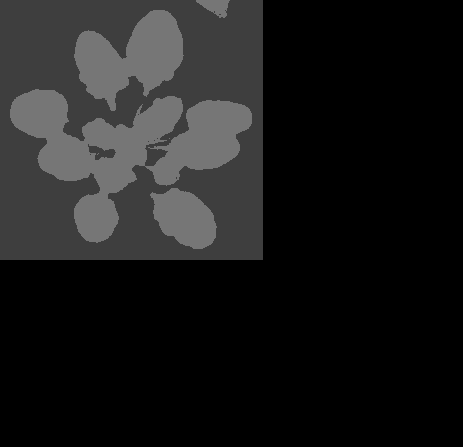

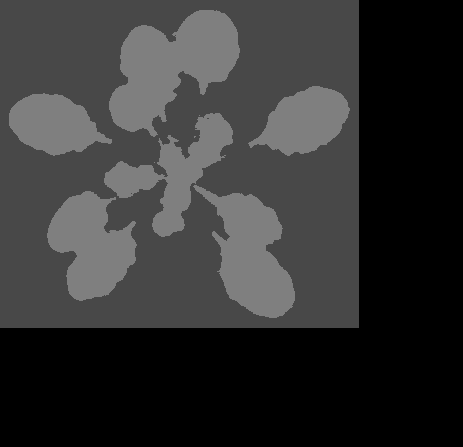

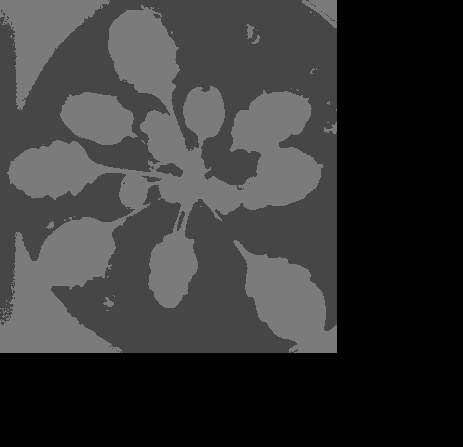

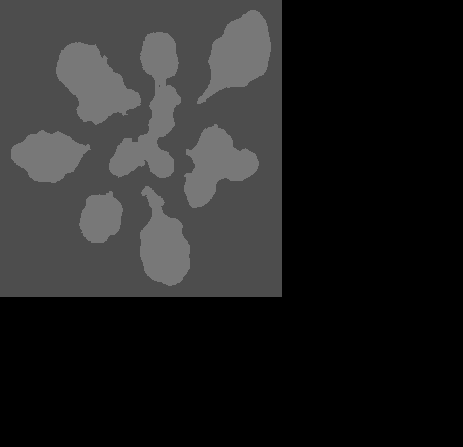

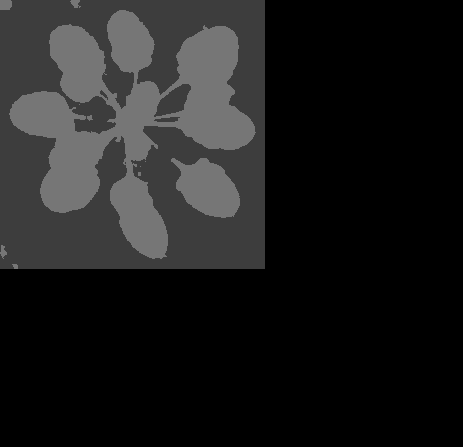

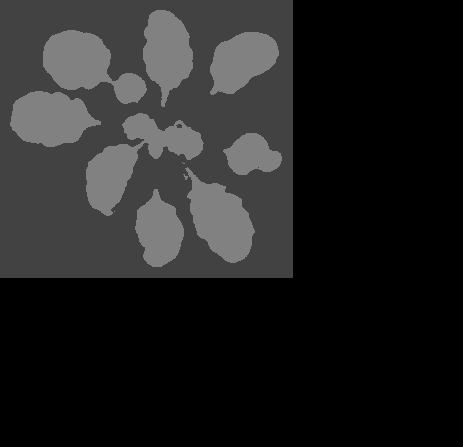

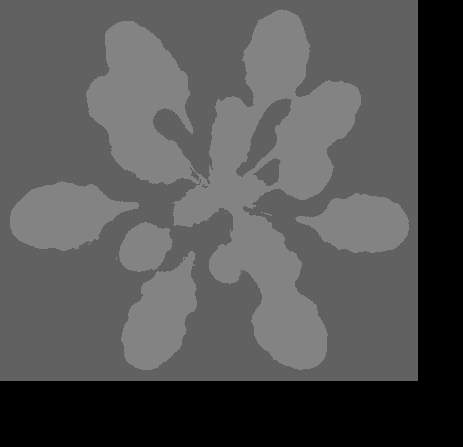

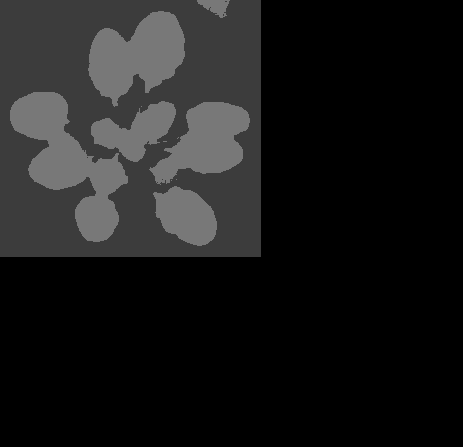

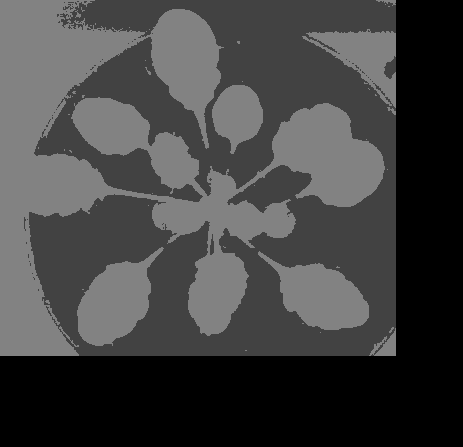

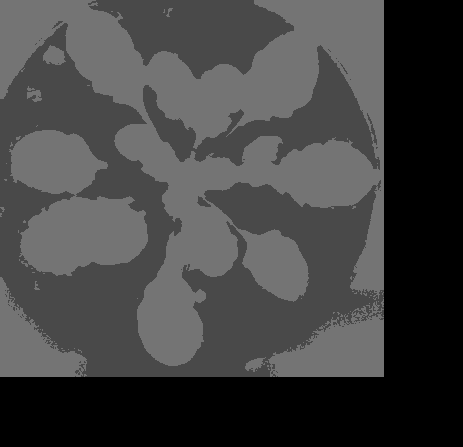

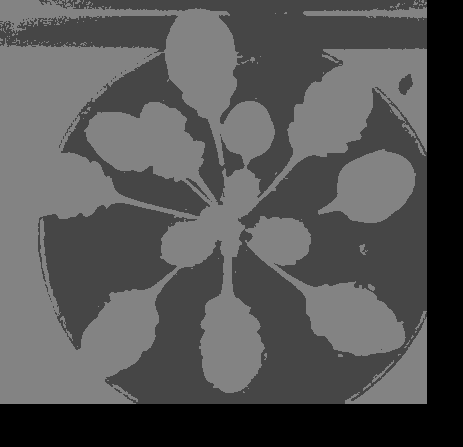

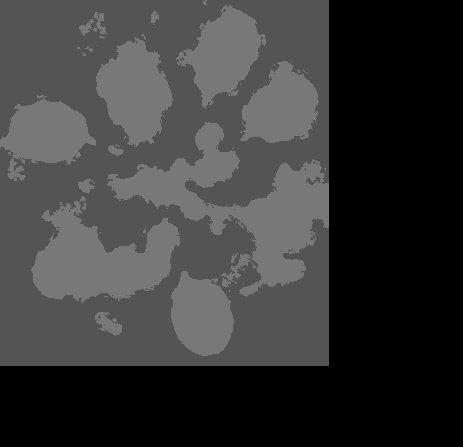

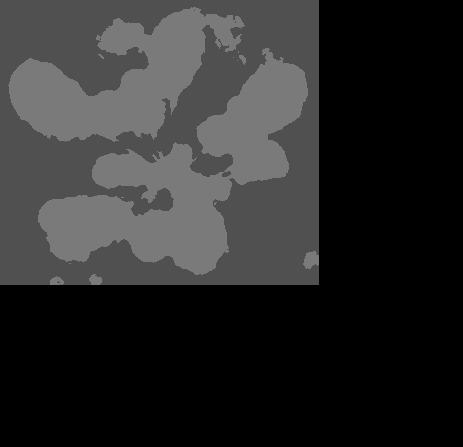

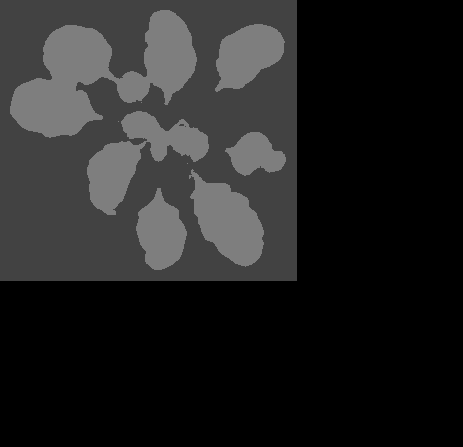

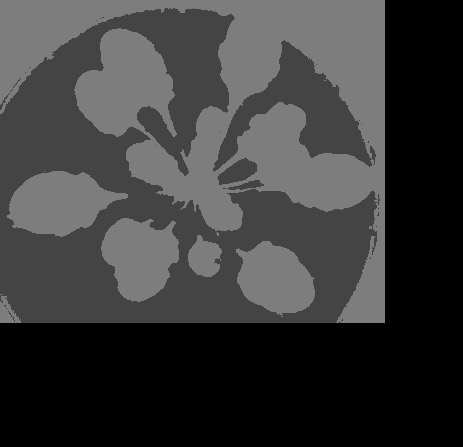

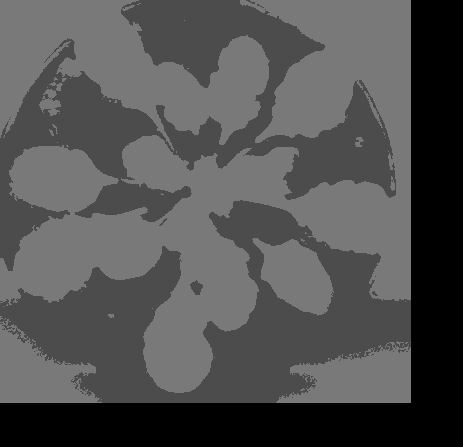

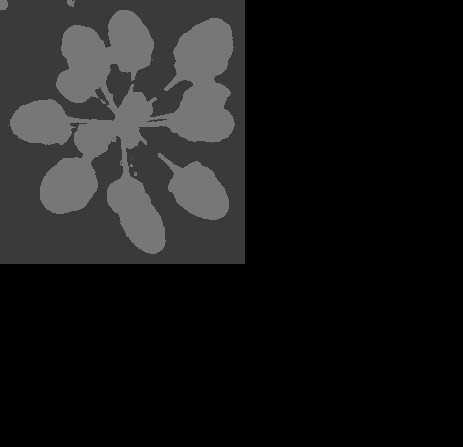

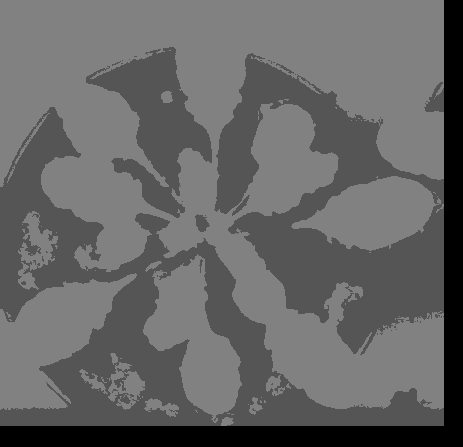

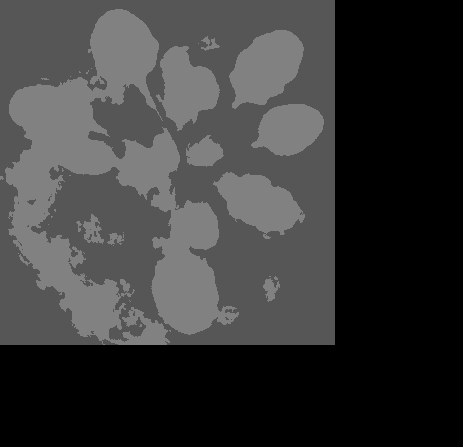

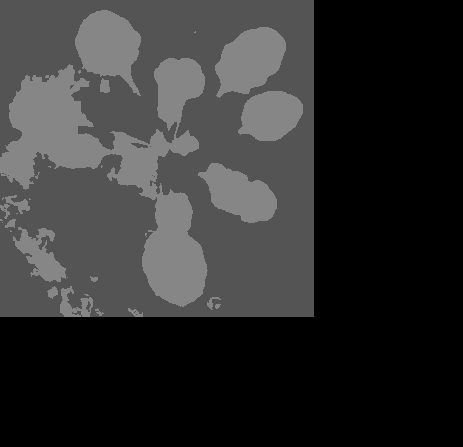

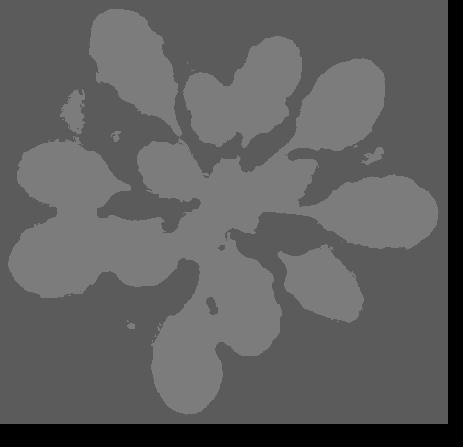

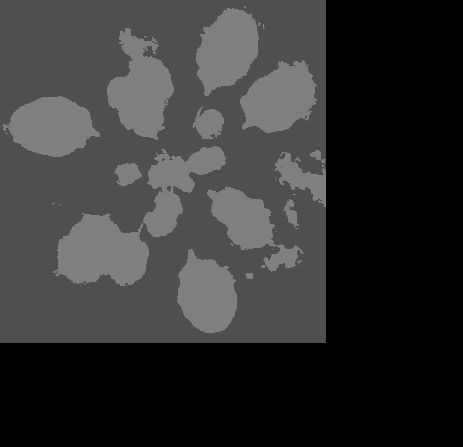

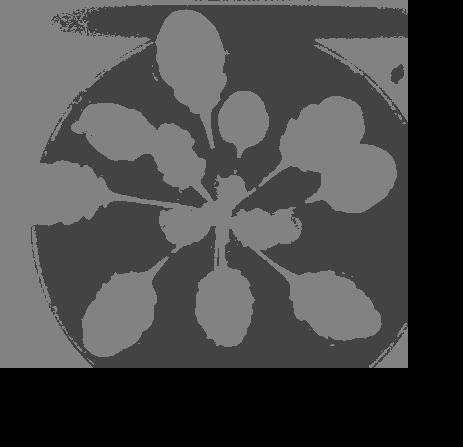

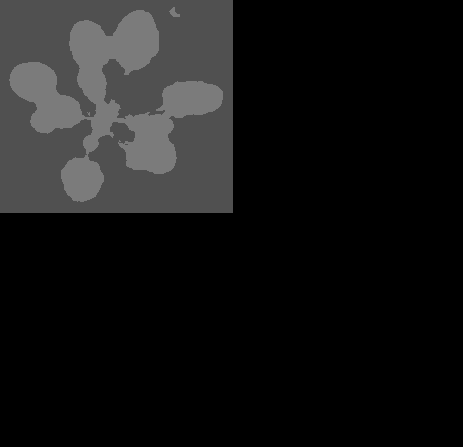

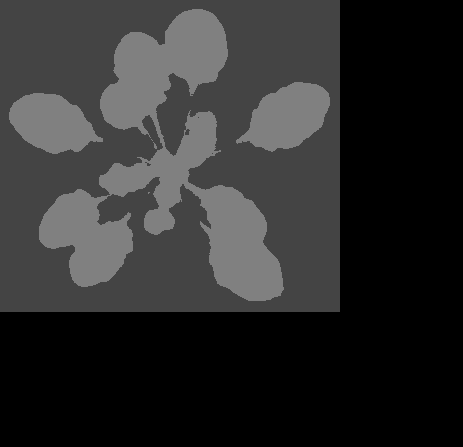

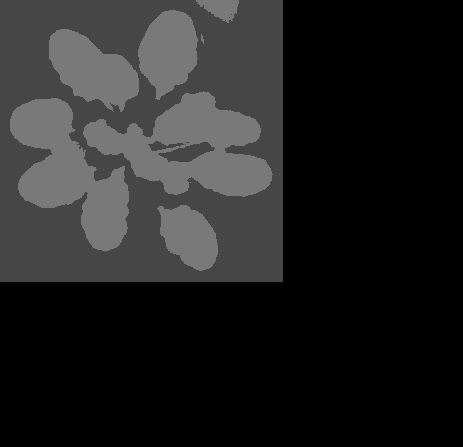

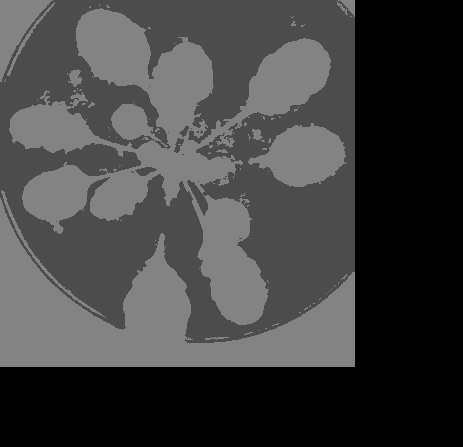

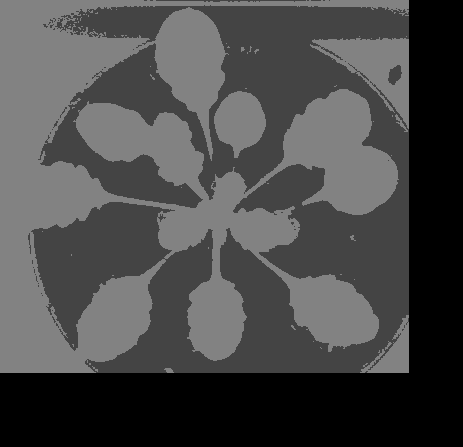

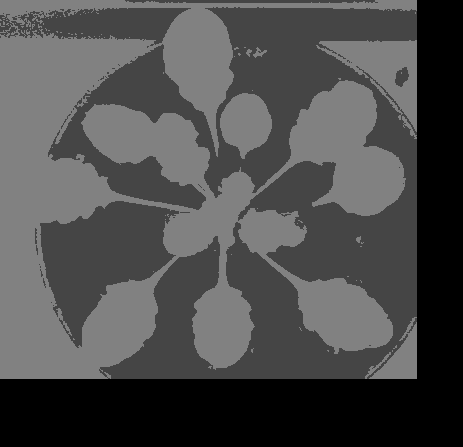

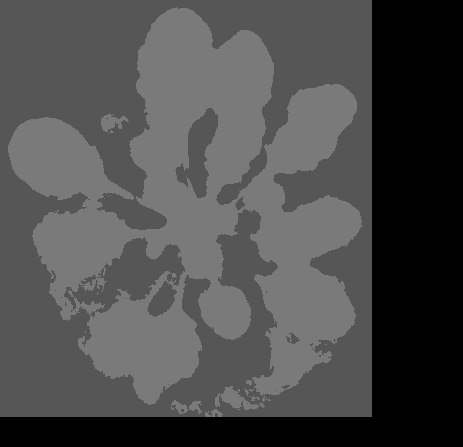

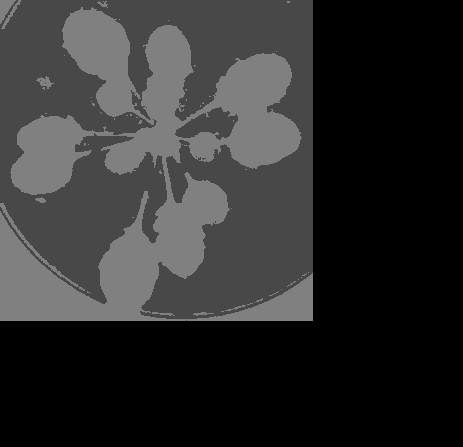

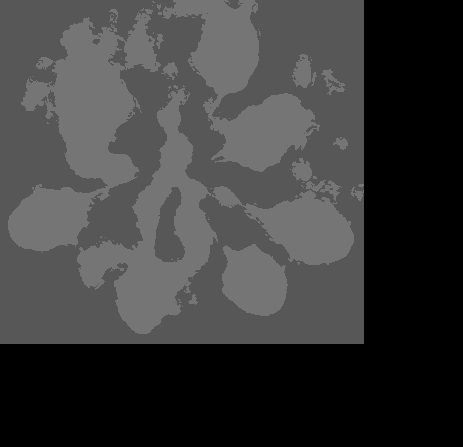

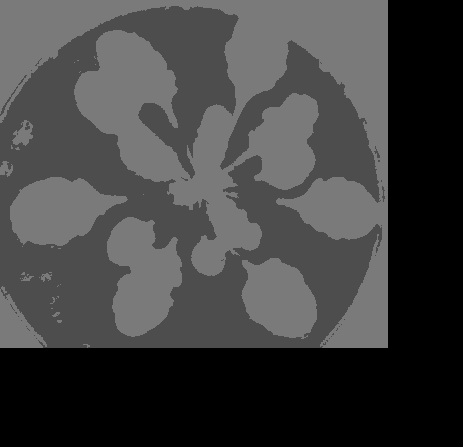

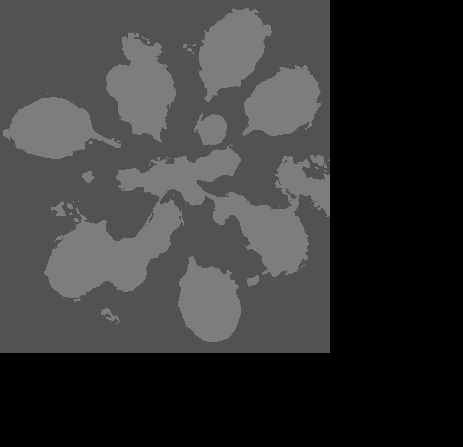

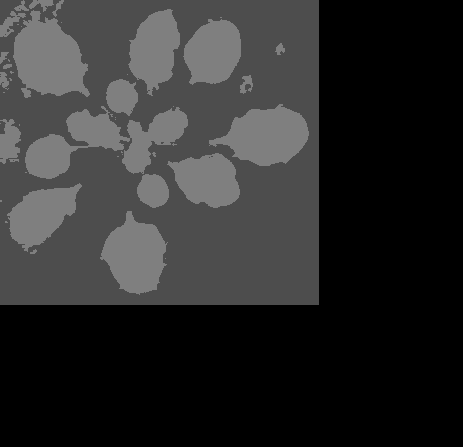

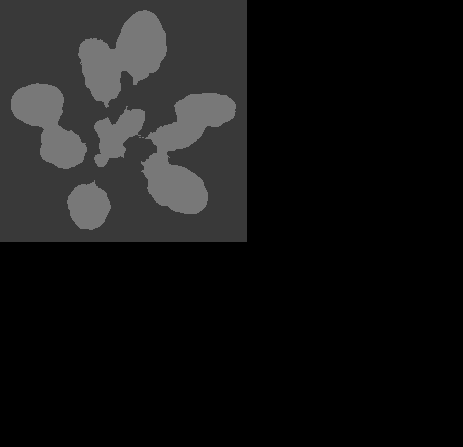

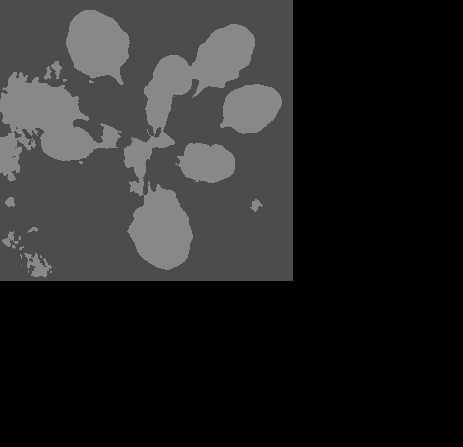

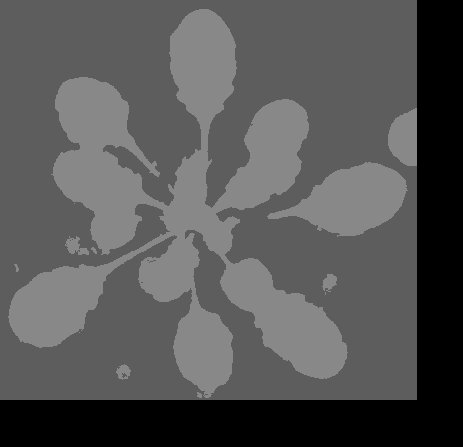

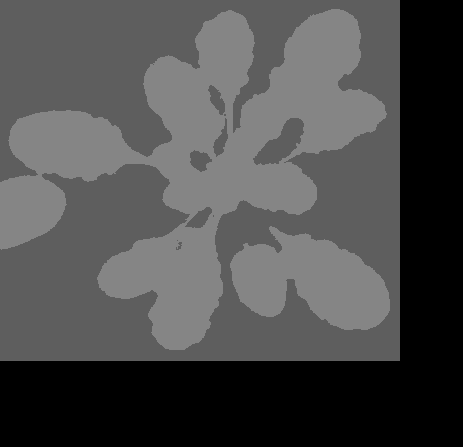

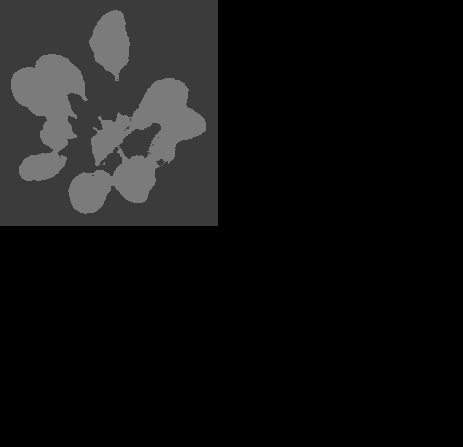

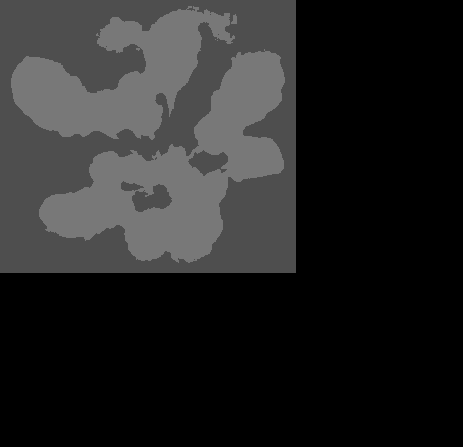

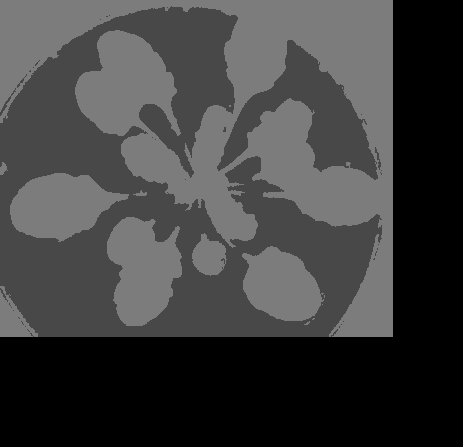

In [ ]:
maxX=0
maxY=0
for image in images:
  if image.shape[0]>maxX:
    maxX=image.shape[0]
  if image.shape[1]>maxY:
    maxY=image.shape[1]

data =np.zeros((120,maxX,maxY))
i=0

for image in images:
  ret,label,image=segment(image,3)
  ret,label,image = segment(image,2)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image = cv2.bilateralFilter(image,20,50,50)
  #cv2_imshow(test2)
  tmp = cv2.cvtColor(image,cv2.COLOR_GRAY2BGR)
  a,b,image = segment(tmp,2)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  tmpz=np.zeros((maxX,maxY))
  #image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  tmpz[:image.shape[0],:image.shape[1]] = image
  data[i]=tmpz
  i=i+1
  cv2_imshow(data[i-1])

In [ ]:
gray = cv2.cvtColor(res3, cv2.COLOR_BGR2GRAY)
    
    

    
    
gray.shape



226

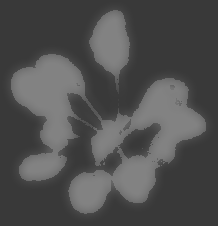

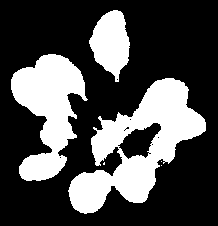

In [ ]:
test2 = cv2.bilateralFilter(gray,20,50,50)
cv2_imshow(test2)
tmp = cv2.cvtColor(test2,cv2.COLOR_GRAY2BGR)
a,b,test3 = segment(tmp,2)
test3=cv2.cvtColor(test3,cv2.COLOR_BGR2GRAY)

for i in range(0,test3.shape[0]):
      for j in range(0,test3.shape[1]):
        if test3[i][j]>60:
          test3[i][j]=255
        if test3[i][j] < 60:
          test3[i][j]=0

cv2_imshow(test3)




Using the mask as a selector we can get the average color values


In [ ]:
#sumb=0
#sumg=0
#sumr=0
#count=0
#colorimg = images[0]
#for i in range(test3.shape[0]):
#  for j in range(test3.shape[1]):
#    if test3[i][j]!=0:
#      sumb+=colorimg[i][j][0]
#      sumg+=colorimg[i][j][1]
#      sumr+=colorimg[i][j][2]
#      count+=1
#cv2_imshow(colorimg)
#print("average B"=sumb/count)
#print("average g"=sumg/count)
#print("average r"=sumr/count)

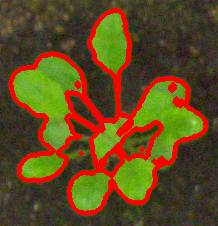

In [ ]:

ret, threshold = cv2.threshold(gray, 90, 255, 0)

contours, hierarchy =  cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, contours, -1, (0, 0, 255), 3)
cv2_imshow(img)

In [ ]:
def findGreatesContour(contours):
    largest_area = 0
    largest_contour_index = -1
    i = 0
    total_contours = len(contours)
    while (i < total_contours ):
        area = cv2.contourArea(contours[i])
        if(area > largest_area):
            largest_area = area
            largest_contour_index = i
        i+=1
            
    return largest_area, largest_contour_index
# to get the center of the contour

largest_area, largest_contour_index = findGreatesContour(contours)

def contourslist(contours,threshold_area):
  arr=np.array([])
  i = 0
  total_contours = len(contours)
  while (i < total_contours ):
    area = cv2.contourArea(contours[i])
    if(area > threshold_area):
      arr = np.append(arr,[i])  
    i+=1
  return arr


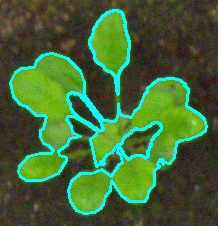

In [ ]:
array = contourslist(contours,largest_area/100)

img2 = imgoriginal.copy()
for i in array:
  cnt = contours[int(i)]
  epsilon = 0.001*cv2.arcLength(cnt,True)
  approx = cv2.approxPolyDP(cnt,epsilon,False)
  test = cv2.drawContours(img2,[approx],0,(255,255,0),2)


cv2_imshow(test)